## Project 2

### This section takes the dataframe from part 2 and models it.

In [28]:
# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing, pipeline
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import csv
%matplotlib inline


In [5]:
df900=pd.read_csv('/Users/ljborton/Desktop/sea18_ds5/projects/02-Luther/backup/df900_clean_add.csv')

In [6]:
#Selecting the relevant columns
df_mvp = df900[['Company','Reviews_clean', 'CEO_Reviews_clean','Benefit_Rating_clean', 'Founded_clean', 'Revenue_clean2', 'Size_clean', 'Headquarters_clean','Industry', 'Private_public_clean']].copy()

In [7]:
df_mvp.shape

(135, 10)

In [8]:

df_mvp.head()

,Company,Reviews_clean,CEO_Reviews_clean,Benefit_Rating_clean,Founded_clean,Revenue_clean2,Size_clean,Headquarters_clean,Industry,Private_public_clean
0,New Relic,4.2,95.0,4.0,2008.0,500.0,1001.0,0,Computer Hardware & Software,1.0
1,Akraya,3.5,84.0,3.5,2001.0,50.0,201.0,0,Staffing & Outsourcing,0.0
2,Henkel,3.4,74.0,3.9,1876.0,50000.0,10001.0,0,Consumer Products Manufacturing,1.0
3,Robert Half,3.3,71.0,3.0,1948.0,5000.0,10001.0,0,Staffing & Outsourcing,1.0
4,Attunix,5.0,100.0,2.0,2006.0,1.0,1.0,1,Advertising & Marketing,0.0


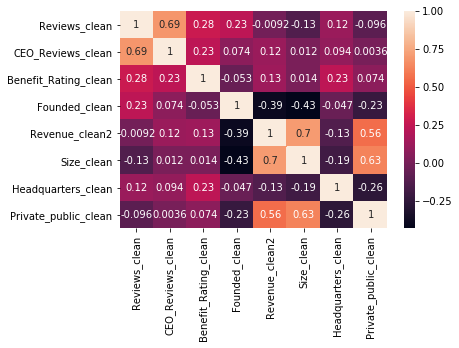

In [9]:
#Initial heatmap
sns.heatmap(df_mvp.corr(), annot=True);

None of the correlations between features are large (none above 0.5) so there is no obvious multicolinearity.

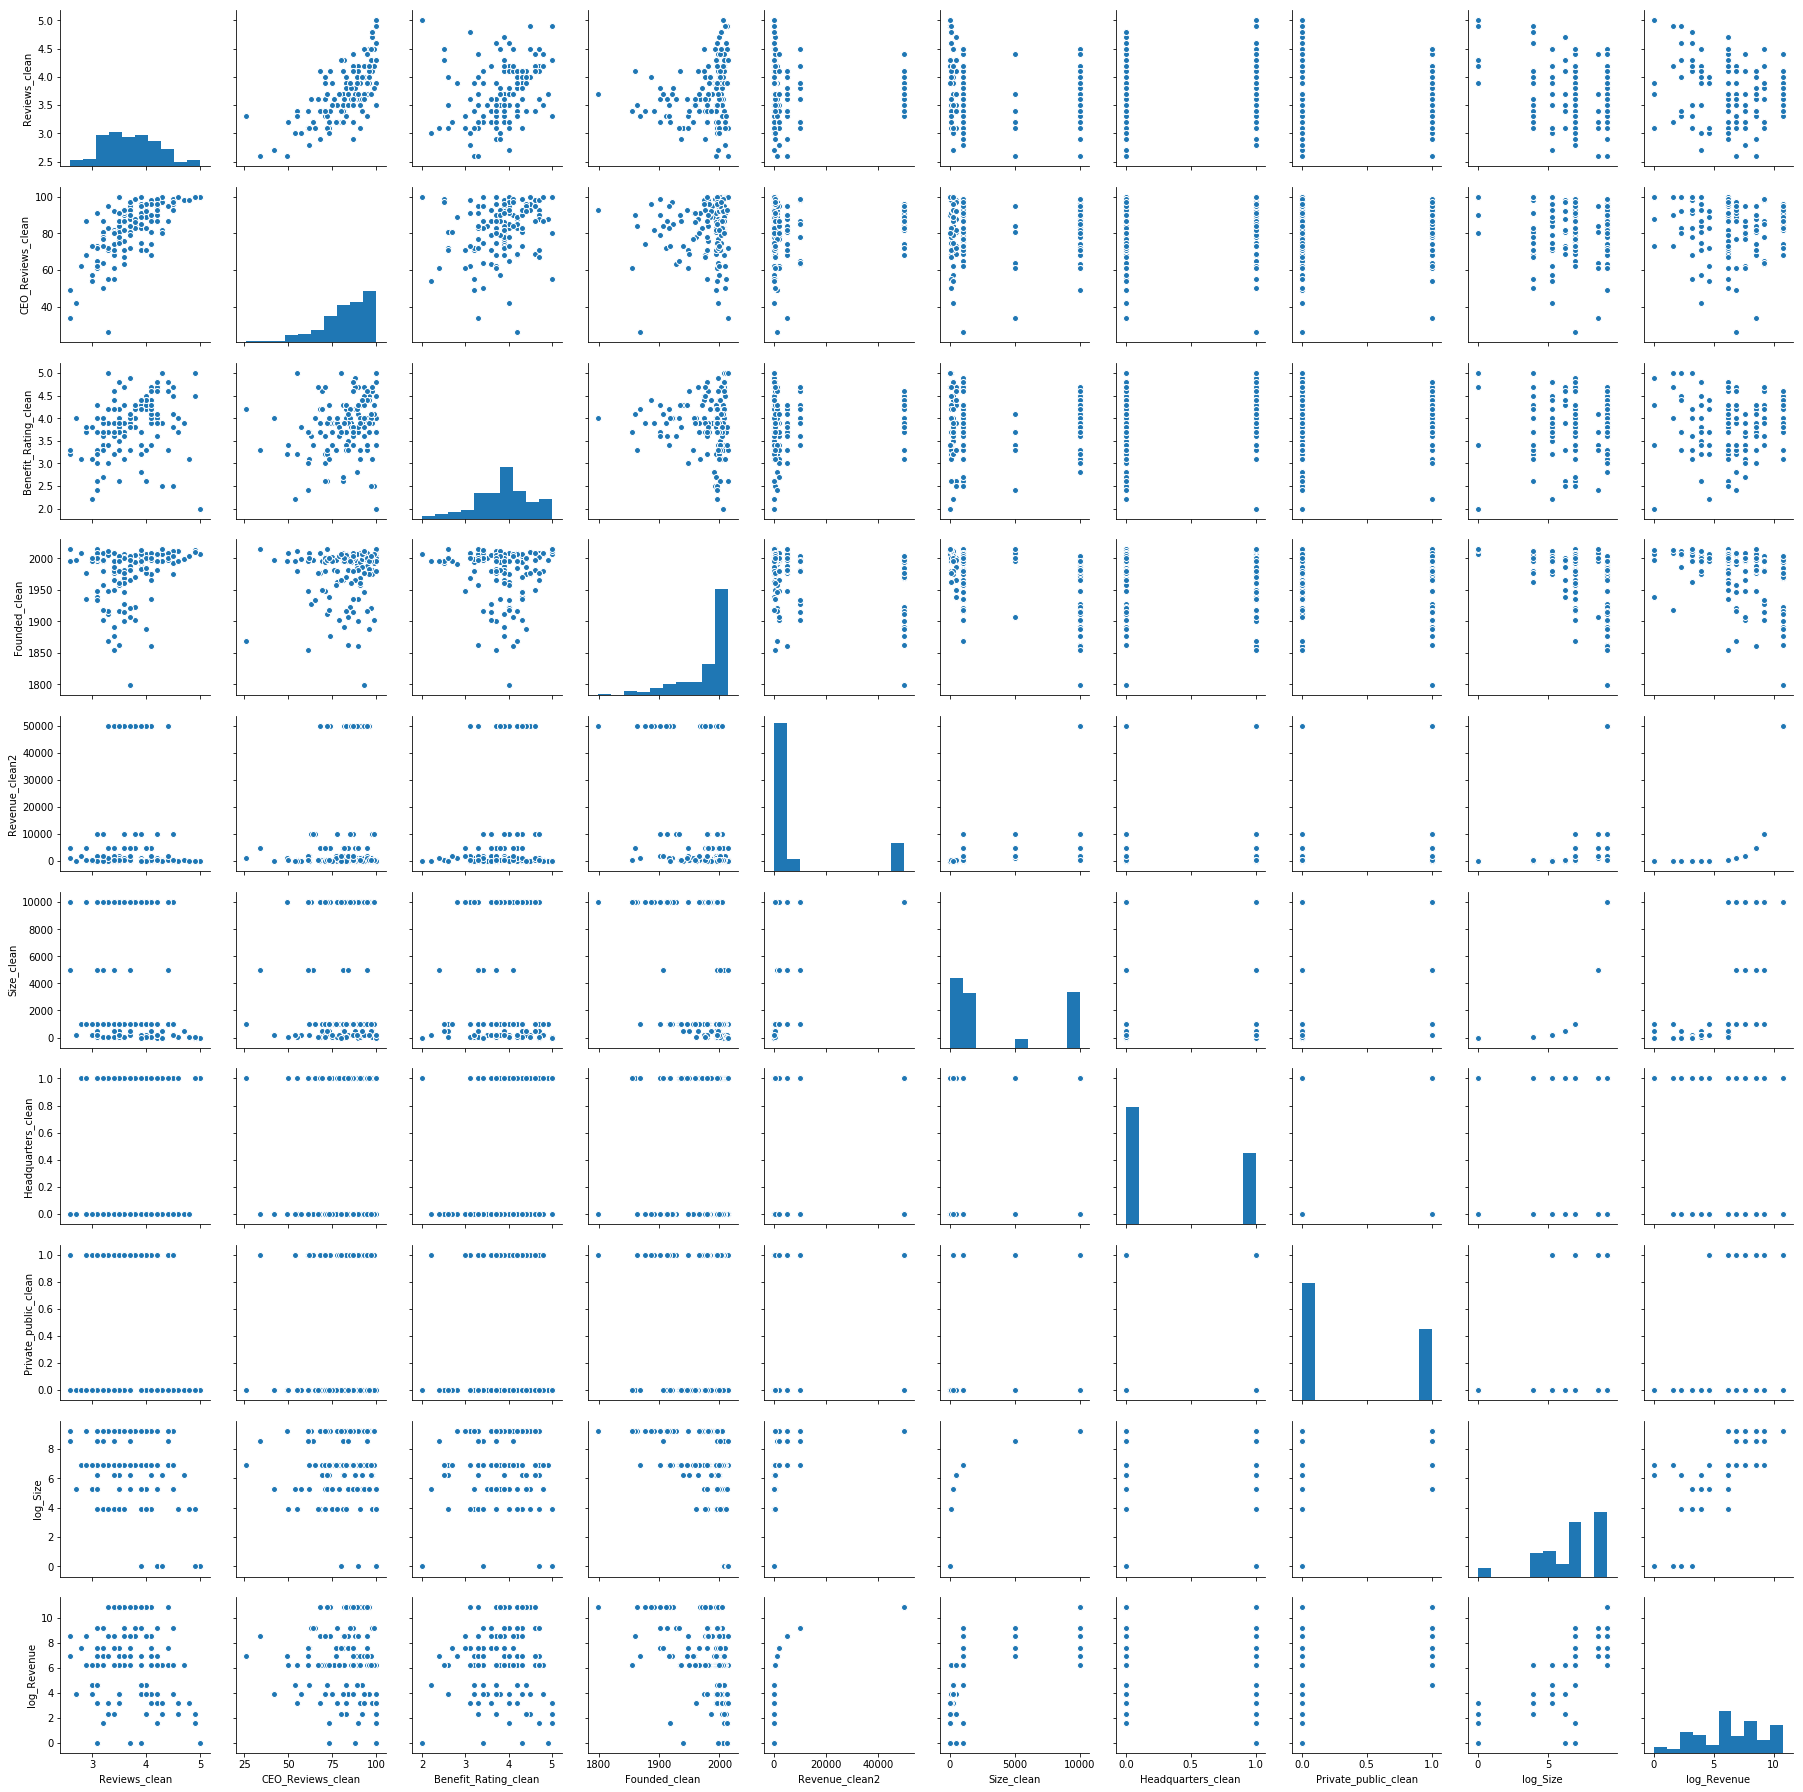

In [17]:
#Initial pairplot
sns.pairplot(df_mvp)

In [ ]:
The pairplot does not show any correlations between features either.

Revenue and Size are exponential so we should take the log for each.

In [11]:
df_mvp['log_Size'] = np.log(df_mvp['Size_clean'])
df_mvp['log_Revenue'] = np.log(df_mvp['Revenue_clean2'])

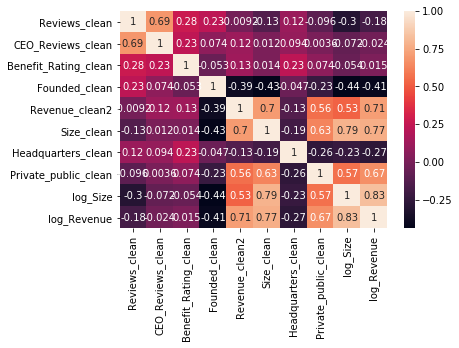

In [12]:
# Redoing heat map with log_Size, log_Revenue added
sns.heatmap(df_mvp.corr(), annot=True);

In [13]:
At 0.3, the log_Size correlation now may be sigificant.

SyntaxError: invalid syntax (<ipython-input-13-301873fb7bb1>, line 1)

In [14]:
# Let's model with all features first
model1 = smf.ols('Reviews_clean ~ Benefit_Rating_clean + Founded_clean + CEO_Reviews_clean + log_Size + log_Revenue+Headquarters_clean + Private_public_clean', data = df_mvp)
fit1 = model1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Reviews_clean   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     23.16
Date:                Mon, 23 Jul 2018   Prob (F-statistic):           5.15e-20
Time:                        17:02:12   Log-Likelihood:                -42.100
No. Observations:                 135   AIC:                             100.2
Df Residuals:                     127   BIC:                             123.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.8861      1.695     -0.523      0.602      -4.241       2.468
Benefit_Rating_clean     0.0954      0.052      1.849      0.067      -0.007       0.197
Founded_clean            0.0014      0.001      1.679      0.096      -0.000       0.003
CEO_Reviews_clean        0.0219      0.002     10.380      0.000       0.018       0.026
log_Size                -0.0681      0.024     -2.841      0.005      -0.115      -0.021
log_Revenue              0.0247      0.021      1.159      0.248      -0.017       0.067
Headquarters_clean       0.0005      0.066      0.008      0.994      -0.131       0.132
Private_public_clean     0.0054      0.082      0.066      0.948      -0.158       0.169
==============================================================================
Omnibus:                        0.338   Durbin-Watson:                   2.279
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.101
Skew:                          -0.039   Prob(JB):                        0.951
Kurtosis:                       3.110   Cond. No.                     1.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Lets model using features with correlations greater than 0.15 (removing Headquarters_clean, Private_public_clean)
model2 = smf.ols('Reviews_clean ~ Benefit_Rating_clean + Founded_clean + CEO_Reviews_clean + log_Size + log_Revenue', data = df_mvp)
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Reviews_clean   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     32.94
Date:                Thu, 19 Jul 2018   Prob (F-statistic):           1.55e-21
Time:                        13:01:36   Log-Likelihood:                -42.102
No. Observations:                 135   AIC:                             96.20
Df Residuals:                     129   BIC:                             113.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.8968      1.651     -0.543      0.588      -4.163       2.369
Benefit_Rating_clean     0.0958      0.050      1.933      0.055      -0.002       0.194
Founded_clean            0.0014      0.001      1.727      0.087      -0.000       0.003
CEO_Reviews_clean        0.0219      0.002     10.475      0.000       0.018       0.026
log_Size                -0.0680      0.024     -2.865      0.005      -0.115      -0.021
log_Revenue              0.0252      0.019      1.325      0.188      -0.012       0.063
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   2.281
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.104
Skew:                          -0.040   Prob(JB):                        0.950
Kurtosis:                       3.109   Cond. No.                     1.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Removing Headquarters and Public/Private features improved the Adjusted Rsquared.

In [15]:
# Get correlations in absolute value order
order = np.argsort(-df_mvp.corr()['Reviews_clean'].abs())
df_mvp.corr()['Reviews_clean'][order]

Reviews_clean           1.000000
CEO_Reviews_clean       0.687165
log_Size               -0.296075
Benefit_Rating_clean    0.278680
Founded_clean           0.233771
log_Revenue            -0.179323
Size_clean             -0.129882
Headquarters_clean      0.115803
Private_public_clean   -0.095583
Revenue_clean2         -0.009233
Name: Reviews_clean, dtype: float64

Log_revenue has a high correlation, but high p-value.  Let's model without it.

In [138]:
#Removing log_revenue due to high p value (greater than 0.1)
model3 = smf.ols('Reviews_clean ~ Benefit_Rating_clean + Founded_clean + CEO_Reviews_clean + log_Size', data = df_mvp)
fit3 = model3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Reviews_clean   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     40.50
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           5.33e-22
Time:                        17:24:12   Log-Likelihood:                -43.014
No. Observations:                 135   AIC:                             96.03
Df Residuals:                     130   BIC:                             110.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.7645      1.652     -0.463      0.644      -4.033       2.504
Benefit_Rating_clean     0.1016      0.049      2.054      0.042       0.004       0.199
Founded_clean            0.0013      0.001      1.620      0.108      -0.000       0.003
CEO_Reviews_clean        0.0221      0.002     10.518      0.000       0.018       0.026
log_Size                -0.0428      0.014     -3.006      0.003      -0.071      -0.015
==============================================================================
Omnibus:                        0.545   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.762   Jarque-Bera (JB):                0.296
Skew:                          -0.102   Prob(JB):                        0.862
Kurtosis:                       3.104   Cond. No.                     1.12e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Removing log_Revenue hurt the adjusted Rsquared so we will keep model2 and leave it in

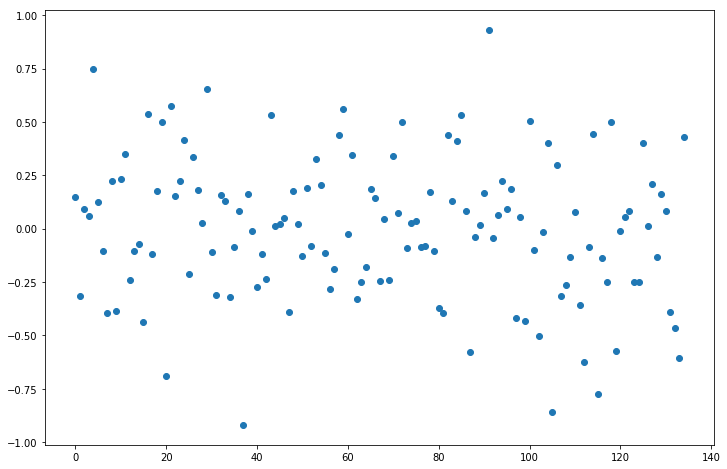

In [40]:
#Plot residuals to test for randomness
fit2.resid.plot(style='o', figsize=(12,8))

Appears random.  

The above runs are for the whole data set.  What about an out-of-sample test?  Let's use training and testing
datasets on all the features again.

In [36]:
y=df_mvp['Reviews_clean']
X=df_mvp[['Benefit_Rating_clean', 'Founded_clean', 'CEO_Reviews_clean', 'log_Size', 'log_Revenue','Private_public_clean',  'Headquarters_clean']]
model4 = LinearRegression()
# # Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 5)
# # Fit the model against the training data
model4.fit(X_train, y_train)
# # Evaluate the model against the testing data (Rˆ2)
print(model4.score(X_train, y_train))
print(mean_squared_error(y_test, model4.predict(X_test)))

0.6281430795645271
0.15391270114441433


What if we use the same feature from model2?

In [37]:
y=df_mvp['Reviews_clean']
X=df_mvp[['Benefit_Rating_clean','Founded_clean',  'CEO_Reviews_clean', 'log_Size', 'log_Revenue']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 5)
model5 = LinearRegression()
model5.fit(X_train, y_train)
# # Evaluate the model against the testing data (Rˆ2)
#print (model5.score(X_test, y_test))
print (model5.score(X_train, y_train))
print(mean_squared_error(y_test, model5.predict(X_test)))

0.6238926972424663
0.14557232770318088


In [20]:
# 10-fold cross-validation 
scores1 = cross_val_score(model5, X_train, y_train, cv=10, scoring='r2')
scores2 = cross_val_score(model5, X_train, y_train, cv=10, scoring='mean_squared_error')
# scores output is negative, a sklearn quirk bc mse is used to min. optimization func.
print('Rˆ2 for each cross-val:',scores1,'\n')
print('Mean Rˆ2 of all cross vals:',np.mean(scores1),'+-',np.std(scores1))
print('Mean for each cross-val:',-scores2,'\n')
print('Mean of all cross vals:',np.mean(-scores2),'+-',np.std(-scores2))

Rˆ2 for each cross-val: [ 0.59600795  0.79349948  0.54165612  0.55165141  0.36841488 -0.24833231
 -0.34448847  0.43987738 -0.467084    0.64829777] 

Mean Rˆ2 of all cross vals: 0.2879500208236848 +- 0.4360556998928516
Mean for each cross-val: [0.13416576 0.06649317 0.09629805 0.11674997 0.10167741 0.1510328
 0.17162976 0.14618509 0.08730055 0.11020003] 

Mean of all cross vals: 0.11817325907224707 +- 0.030688697647206588


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/anaconda3/lib/python3.6/site-packages/sklearn/m

Rsquared is all over the place, unfortunately.  

Will adding polynomials help?

The degree 2 had an MSE of: 0.10246475547190033
The degree 2 had an Rsquared of: -0.48259604614993157
The degree 1 had an MSE of: 0.12408557979308873
The degree 1 had an Rsquared of: -0.3429632662974368


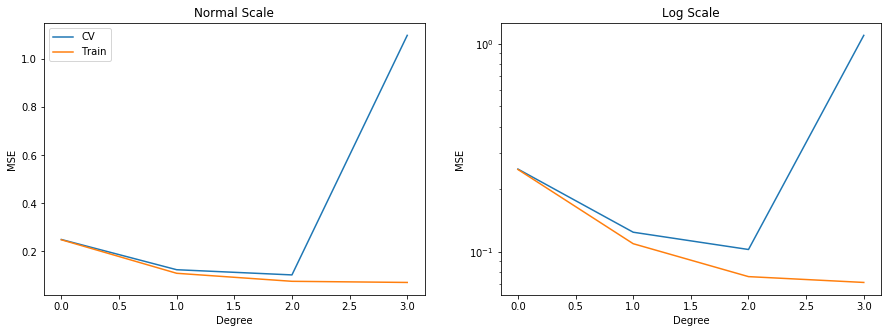

In [135]:
model = LinearRegression()
res_cv = {}
r2_cv = {}
res_train = {}
for degree in range(4):
    
    # transforms the data to polynomials
    poly = PolynomialFeatures(degree)
    X1 = poly.fit_transform(X)
    
    # calculates the MSE for CV
    scores = cross_val_score(model, X1, y, cv=10, scoring='mean_squared_error') # cross val
    scoresr = cross_val_score(model, X1, y, cv=10, scoring='r2') 
    res_cv[degree] = np.mean(-scores)
    r2_cv[degree] = np.mean(-scoresr)
    
    # calculates the MSE for Training Set    
    model.fit(X1,y)
    y_pred = model.predict(X1)
    res_train[degree] = np.sum((y_pred-y)**2)/len(y)
    
degrees = list(res_cv.keys())
mse_cv = list(res_cv.values())
mse_train = list(res_train.values())
r2_cv = list(r2_cv.values())

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.plot(degrees,mse_cv)
plt.plot(degrees,mse_train)
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('Normal Scale')
plt.legend(['CV','Train'])

plt.subplot(1,2,2)
plt.semilogy(degrees,mse_cv)
plt.semilogy(degrees,mse_train)
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.title('Log Scale')

loc = np.argmin(list(res_cv.values()))
print('The degree',degrees[loc],'had an MSE of:',mse_cv[loc])
print('The degree',degrees[loc],'had an Rsquared of:',r2_cv[loc])
print('The degree',degrees[1],'had an MSE of:',mse_cv[1])
print('The degree',degrees[1],'had an Rsquared of:',r2_cv[1])

The Rsquared values are really bad (cross-validation), but it looks like we should try degree 2 polynomials.

In [31]:
# Adding degree 2 polynomial to Linear Regression
degree=2
est = make_pipeline(PolynomialFeatures(degree), StandardScaler(),LinearRegression())
est.fit(X_train, y_train)
print(est.score(X_train, y_train))
print(mean_squared_error(y_test, est.predict(X_test)))

0.7580940328584569
0.24259885756927793


Maybe Scaling and/or Lasso or Ridge Regression will help.

In [63]:
#LASSO, DEGREE = 2
degree = 2
alphas = [1e-40,1e-30,1e-15,1e-10,1e-5,1e-1,1]

sse_tr_Lasso = []
sse_te_Lasso = []
r2_tr_Lasso = []
r2_te_Lasso = []
for alpha in alphas:
    lasso2 = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Lasso(alpha=alpha))
    lasso2.fit(X_train, y_train)
    sse_tr_Lasso.append(mean_squared_error(y_train, lasso2.predict(X_train)))
    sse_te_Lasso.append(mean_squared_error(y_test, lasso2.predict(X_test)))
    r2_tr_Lasso.append(lasso2.score(X_train,y_train))
    r2_te_Lasso.append(lasso2.score(X_test,y_test))
#print (sse_tr_Lasso)
print (sse_te_Lasso)
print (r2_tr_Lasso)
#print (r2_te_Lasso)

[0.1027962582792006, 0.1027962582792006, 0.10279625827920905, 0.10279625911135211, 0.1028787217069782, 0.11374700578944703, 0.1927690766156189]
[0.6938434523394046, 0.6938434523394046, 0.6938434523393919, 0.6938434510790155, 0.6937166906215952, 0.5374433485346293, 0.0]


In [51]:
#LASSO, DEGREE = 1
degree = 1
alphas = [1e-10,1e-5,1e-3,1e-1,1]

sse_tr_Lasso = []
sse_te_Lasso = []
r2_tr_Lasso = []
r2_te_Lasso = []
for alpha in alphas:
    lasso1 = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Lasso(alpha=alpha))
    lasso1.fit(X_train, y_train)
    sse_tr_Lasso.append(mean_squared_error(y_train, lasso1.predict(X_train)))
    sse_te_Lasso.append(mean_squared_error(y_test, lasso1.predict(X_test)))
    r2_tr_Lasso.append(lasso1.score(X_train,y_train))
    r2_te_Lasso.append(lasso1.score(X_test,y_test))
#print (sse_tr_Lasso)
print (sse_te_Lasso)
print (r2_tr_Lasso)
#print (r2_te_Lasso)

[0.14557232758569463, 0.14556058153885013, 0.14441625758067786, 0.11389181755036674, 0.1927690766156189]
[0.6238926972424665, 0.6238926917918814, 0.6238384401754181, 0.5215698528646, 0.0]


In [52]:
#RIDGE, DEGREE = 2
degree = 2
alphas = [1,10,100,1000, 10000]
sse_tr_Ridge = []
sse_te_Ridge = []
r2_tr_Ridge = []
r2_te_Ridge = []
for alpha in alphas:
    ridge2 = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Ridge(alpha=alpha))
    ridge2.fit(X_train, y_train)
    #sse_tr_Ridge.append(mean_squared_error(y_train, est.predict(X_train)))
    sse_te_Ridge.append(mean_squared_error(y_test, ridge2.predict(X_test)))
    r2_tr_Ridge.append(ridge2.score(X_train,y_train))
    #r2_te_Ridge.append(est.score(X_test,y_test))
#print (sse_tr_Ridge)
print (sse_te_Ridge)
print (r2_tr_Ridge)
#print (r2_te_Ridge)

[0.11688181273488712, 0.1282920115732543, 0.10516054424082072, 0.13052605736826917, 0.18199816239587607]
[0.6615660474753686, 0.6378926825781882, 0.5924984953735271, 0.31205726944997164, 0.05181800441321238]


And let's try with degree 1 and alteriing lambdas in Ridge Regression

In [53]:
#RIDGE, DEGREE = 1
degree = 1
alphas = [1,10,100,1000, 10000]
sse_tr_Ridge = []
sse_te_Ridge = []
r2_tr_Ridge = []
r2_te_Ridge = []
for alpha in alphas:
    ridge1 = make_pipeline(PolynomialFeatures(degree), StandardScaler(), Ridge(alpha=alpha))
    ridge1.fit(X_train, y_train)
    sse_tr_Ridge.append(mean_squared_error(y_train, ridge1.predict(X_train)))
    sse_te_Ridge.append(mean_squared_error(y_test, ridge1.predict(X_test)))
    r2_tr_Ridge.append(ridge1.score(X_train,y_train))
    r2_te_Ridge.append(ridge1.score(X_test,y_test))
#print (sse_tr_Ridge)
print (sse_te_Ridge)
print (r2_tr_Ridge)
#print (r2_te_Ridge)

[0.14277091306135245, 0.12544281731136098, 0.10597944076200262, 0.16562541886496346, 0.18946780009604763]
[0.6237536937334809, 0.6161296744163598, 0.4816181140894964, 0.13119804721605888, 0.015711827726733407]


It appears the lasso degree 2 with lambda = 1e-30 wins.

To get the variable coefficients, break the pipeline down(pipeline doesn't allow printing of coef_)

In [64]:
lasso3 = linear_model.Lasso(alpha=1e-30)
degree = 2
p = PolynomialFeatures(degree)
a = p.fit_transform(X_train)
s = StandardScaler()
s.fit(a)
X_traint = s.transform(a)
lasso3.fit(X_traint, y_train)

b = p.fit_transform(X_test)
X_ttest= s.transform(b)
y_pred = lasso3.predict(X_ttest)

print(lasso3.coef_)
print(X_train.columns)
print(lasso3.score(X_traint, y_train))

[ 0.         -0.02455162 -0.95010618 -0.6458676   0.41914745 -0.06513727
  0.72160971 -0.26005366 -0.54755889 -0.77929074  1.01012022  0.99706002
  0.85820219 -0.26185449 -0.30931966  0.44138391  0.62728953 -0.78461003
 -0.15053118  0.31839615 -0.0140517 ]
Index(['Benefit_Rating_clean', 'Founded_clean', 'CEO_Reviews_clean',
       'log_Size', 'log_Revenue'],
      dtype='object')
0.6938434523394046


With a lambda of 1e-30, the Rsquared with degree 2 is 0.6938.  Need the adjusted Rsquared. n = .7*135=95, k = 20 (see above--the number of coefficients).

In [58]:
r = 0.6938434523394046
n = 135*0.7
k = 20
1-((1-r*r)*(n-1)/(n-k-1))

0.3403081884234511

In [69]:
y_pred = lasso3.predict(X_ttest)

In [70]:
mean_absolute_error(y_test, y_pred)

0.24961567863726966

In [74]:
mean_squared_error(y_test, y_pred)

0.1027962582792006

In [83]:
ybaseline=(y_test*0+np.mean(y_train))
ybaseline.head()

92     3.756383
134    3.756383
10     3.756383
49     3.756383
72     3.756383
Name: Reviews_clean, dtype: float64

In [84]:
mean_absolute_error(y_test, ybaseline)

0.36909704203424953

In [85]:
mean_squared_error(y_test, ybaseline)

0.1927690766156186

Text(0.5,1,'Predicted Company Ratings vs True Company Ratings')

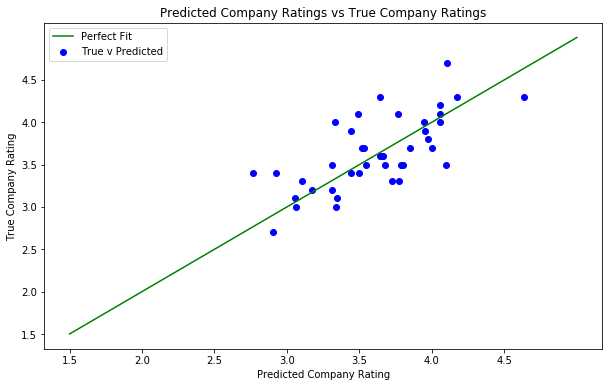

In [82]:
plt.figure(figsize=[10,6])
a = plt.scatter(y_pred,y_test, c = 'blue')
plt.xticks(np.arange(1.5, 5, .5))
plt.yticks(np.arange(1.5, 5, .5))
plt.xlabel('Predicted Company Rating')
plt.ylabel('True Company Rating')

#Perfect fit
b = plt.plot([1.5,5],[1.5,5], c = 'green')

#Baseline: Average Review in Training Data Set
Xb = y_test*0+3.75
# plt.plot([3.7563829787234027,3.7563829787234027],[1.5,5], color = 'orange')
# c = plt.scatter(Xb,y_test,c = 'orange' )

#legend = ax.legend(loc='upper center', shadow=True)
plt.legend(('Perfect Fit','True v Predicted', 'Average Company Rating (Baseline)'),loc= 'best')
plt.title('Predicted Company Ratings vs True Company Ratings')

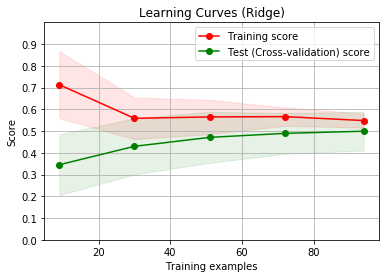

In [234]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xticks(np.arange(0,200,20))
    plt.yticks(np.arange(0,1,.1))
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test (Cross-validation) score")

    plt.legend(loc="best")
    return plt

#digits = load_digits()
X, y = X, y

title = "Learning Curves (Ridge)"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
estimator = ridge
plot_learning_curve(estimator, title, X, y, ylim=(0.0, 1.0), cv=cv, n_jobs=4)

plt.show()

This plot shows that the Rsquared value will never get very big--probably not beyond 0.5.